# Nasdaq Exploration Analysis

Main focuses
- initial dataset exploration
- look at the stocks 
- choosing indicators which will help evaluate stocks


pozri či ti je na niečo adj

In [62]:
import sklearn.cluster
import sklearn.mixture
import sklearn.preprocessing
import sklearn.pipeline

import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal
import matplotlib
import seaborn
import pandas
import numpy
import math
import os

import loader

seaborn.set_theme()
seaborn.set(rc={'figure.figsize':(14, 6)})

### Loading data


In [7]:
period_start = pandas.to_datetime("2015-01-01" ,format= '%Y-%m-%d')
period_end = pandas.to_datetime("2019-01-01" ,format= '%Y-%m-%d')

stocks = loader.get_period(period_start, period_end)
stock_symbols = list(stocks.keys())
print(f"Number of selected stocks: {len(stock_symbols)}")
print(f"Columns of the stocks: {list(stocks[stock_symbols[0]].columns)}")

Number of selected stocks: 1413
Columns of the stocks: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'TimeStamp']


In [18]:
stocks[stock_symbols[0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 2882 to 3887
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1006 non-null   float64       
 1   High       1006 non-null   float64       
 2   Low        1006 non-null   float64       
 3   Close      1006 non-null   float64       
 4   Adj Close  1006 non-null   float64       
 5   Volume     1006 non-null   int64         
 6   TimeStamp  1006 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 62.9 KB


### Industry something

The stocks could be categorized in the following:
- **Industrials**: The industrials sector encompasses a wide range of different businesses that generally involve the use of heavy equipment. Transportation stocks such as airlines, railroads, and logistics companies are found within the industrials sector, as are companies in the aerospace, defense, construction, and engineering industries. Companies making building products, electrical equipment, and machinery also fall into this sector, as do many conglomerates.
- **Real Estate**: The real estate sector generally includes two different types of investments related to real estate. Some stocks in the sector are responsible for developing new real estate projects and then managing them by obtaining tenants for various spaces within the project property. In addition, most real estate investment trusts, which are special tax-favored business entities that operate in various areas of the real estate industry, get counted as within the real estate sector.
- **Basic Materials**: The materials sector includes companies that provide various goods for use in manufacturing and other applications. You'll find makers of chemicals, construction materials, and containers and packaging within the materials sector, along with mining stocks and companies specializing in making paper and forest products.
- **Finance**: The financials sector includes businesses that are primarily related to handling money. Banks are a key industry group within the sector, but you'll also find insurance companies, brokerage houses, consumer finance providers, and mortgage-related real estate investment trusts among financials.
- **Energy**: The energy sector covers companies that do business in the oil and natural gas industry. It includes oil and gas exploration and production companies, as well as producers of other consumable fuels like coal and ethanol. The energy sector also includes the related businesses that provide equipment, materials, and services to oil and gas producers. Oddly enough, though, it doesn't include many renewable energy companies, which instead are considered utilities.
- **Utilities**: The utilities sector encompasses just about every different type of utility company you can think of. Within the sector, you'll find utilities specializing in making electrical power available to residential and commercial customers, as well as specialists in natural gas transmission and distribution. Other utilities are responsible for delivering water to customers. Some utility companies engage in more than one of these different subspecialties. In addition, independent producers of power and renewable electricity also land in the utilities sector, even though they don't exactly resemble the traditional regulated utility in an era of deregulation.
- **Consumer Staples**: The consumer staples sector includes goods and services that consumers need, regardless of their current financial condition. The category includes companies in the food, beverage, and tobacco industries, as well as household and personal care products. You'll also find retail companies that specialize in selling staples, such as supermarkets, in this group.
- **Consumer Discretionary**: The consumer discretionary sector covers goods and services for which consumer demand depends upon consumer financial status. For example, if you make $25,000 per year, you probably buy a different car than someone who makes $25 million per year. The sector includes companies that sell higher-priced items like automobiles and luxury goods, as well as leisure products. You'll find both brick-and-mortar and e-commerce-based retail companies in this category, along with hotel and restaurant stocks.
- **Telecommunications**: The communication services sector is the newest of the GICS sectors and includes a couple of major areas that used to be part of other sectors. Telecommunication services providers, including both wireless telecom networks and providers of old-style landline services, make up one wing of the sector. At the other end are media and entertainment companies, including both older media like television and radio and interactive media via the internet and newer forms of communication.
- **Health Care**: The healthcare sector has two primary components. One component includes companies that develop pharmaceuticals and treatments based on biotechnology, as well as the analytical tools and supplies needed for the clinical trials that test those treatments. The other encompasses healthcare equipment and services, including surgical supplies, medical diagnostic tools, and health insurance.
- **Technology**: The information technology sector covers companies involved in the different categories of technological innovation. Some companies in information technology focus on creating software or providing services related to implementing technological solutions, while others are more involved in building the equipment, components, and hardware that make tech possible. Information technology also includes makers of semiconductors and the’’ equipment used to produce semiconductor chips.
- **Miscellaneous**: All that remains
- **NaNs**: which I excluded from the set

In [78]:
screener = pandas.read_csv("nasdaq_screener.csv")
# nan != nan
mapping = {s:[] for s in set(screener['Sector']) if s == s}

for sym in stock_symbols:
    sector = screener[screener['Symbol'] == sym]['Sector'].values
    
    if sector and isinstance(sector[0], str): 
        mapping[sector[0]].append(sym)

sector_names = mapping.keys()
time_stamps = stocks[stock_symbols[0]]['TimeStamp'].to_list()

/tmp/ipykernel_22370/1285236563.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sector and isinstance(sector[0], str):


Real Estate  Telecommunications  Consumer Discretionary  \
TimeStamps                                                            
2015-01-02  2050.910366          304.904995            4.007159e+07   
2015-01-05  2066.161579          299.900002            3.791042e+07   
2015-01-06  2079.232838          294.920005            3.646884e+07   
2015-01-07  2106.385054          296.949998            3.610706e+07   
2015-01-08  2113.371341          302.110003            3.791020e+07   
...                 ...                 ...                     ...   
2018-12-24  1950.424727          203.599999            1.303617e+04   
2018-12-26  2018.569443          210.900000            1.371907e+04   
2018-12-27  2014.220914          210.330000            1.376661e+04   
2018-12-28  2013.955207          212.540001            1.379477e+04   
2018-12-31  2012.329158          212.270000            1.391512e+04   

             Health Care        Energy   Technology  Industrials    Utilities  \
TimeStamps                                                                      
2015-01-02  93424.717798  2.345704e+06  3605.298184  3604.133458  1435.043740   
2015-01-05  91977.186726  2.150297e+06  3500.063505  3521.984349  1412.011830   
2015-01-06  91469.778365  2.345584e+06  3445.920824  3473.553643  1399.443867   
2015-01-07  90467.268958  2.150268e+06  3476.893210  3489.955838  1416.639262   
2015-01-08  92418.870017  2.150316e+06  3545.844358  3553.265304  1433.687227   
...                  ...           ...          ...          ...          ...   
2018-12-24   5891.009953  3.613388e+03  4851.638671  3670.989272  1693.091338   
2018-12-26   6158.815689  3.657015e+03  5131.847511  3821.724709  1732.046116   
2018-12-27   6207.724931  3.017550e+03  5186.233924  3862.859601  1747.313358   
2018-12-28   6226.515483  2.712950e+03  5192.542946  3865.362586  1751.852883   
2018-12-31   6305.883882  2.741610e+03  5219.886831  3907.605681  1768.306669   

            Basic Materials  Consumer Staples       Finance  Miscellaneous  
TimeStamps                                                                  
2015-01-02       396.846670       1093.728873  18443.585307     282.910002  
2015-01-05       389.985002       1079.802668  18328.562113     278.480003  
2015-01-06       389.998333       1072.998970  18147.583670     270.530001  
2015-01-07       393.314999       1090.755816  18129.172835     272.610001  
2015-01-08       398.209998       1111.509244  18317.400049     279.379999  
...                     ...               ...           ...            ...  
2018-12-24       282.419996       1067.544998   9250.355146     361.419997  
2018-12-26       293.219997       1092.878995   9583.562788     377.009998  
2018-12-27       295.885001       1096.379989   9610.352843     380.469999  
2018-12-28       292.860000       1094.410001   9682.524148     383.259997  
2018-12-31       295.424996       1099.170006   9762.435212     386.069997  

[1006 rows x 12 columns]

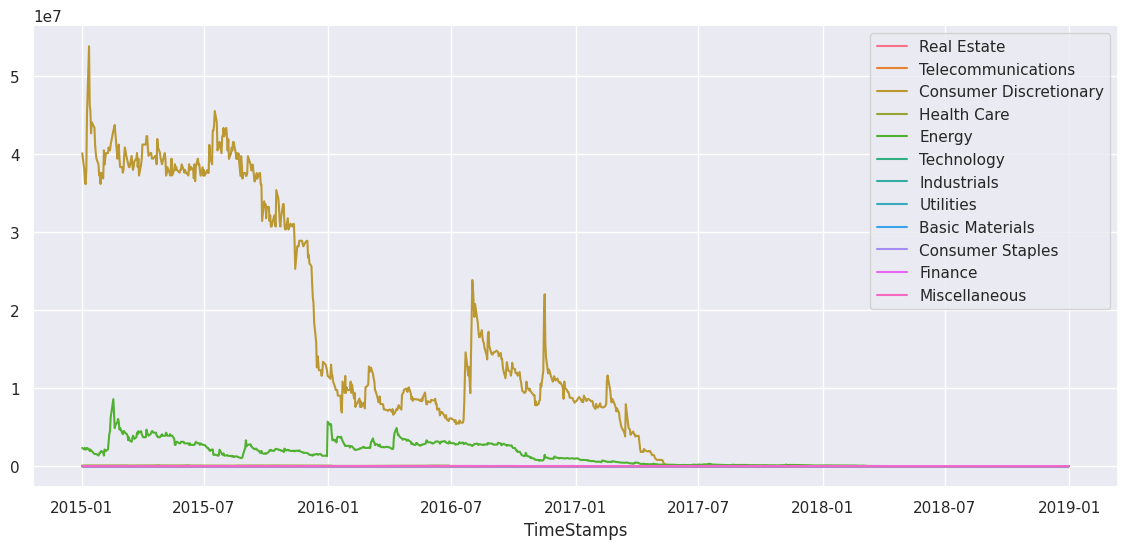

In [55]:
df_industry = pandas.DataFrame(columns=list(mapping.keys()))

for i, sec in enumerate(sector_names):
    industry_dict = {s:stocks[s]['Close'].tolist() for s in mapping[sec]}
    industry = pandas.DataFrame.from_dict(industry_dict)

    df_industry[sec] = industry.sum(axis=1)


df_industry['TimeStamps'] = time_stamps
df_industry = df_industry.set_index('TimeStamps')
fig = seaborn.lineplot(data=df_industry, dashes=False)
df_industry

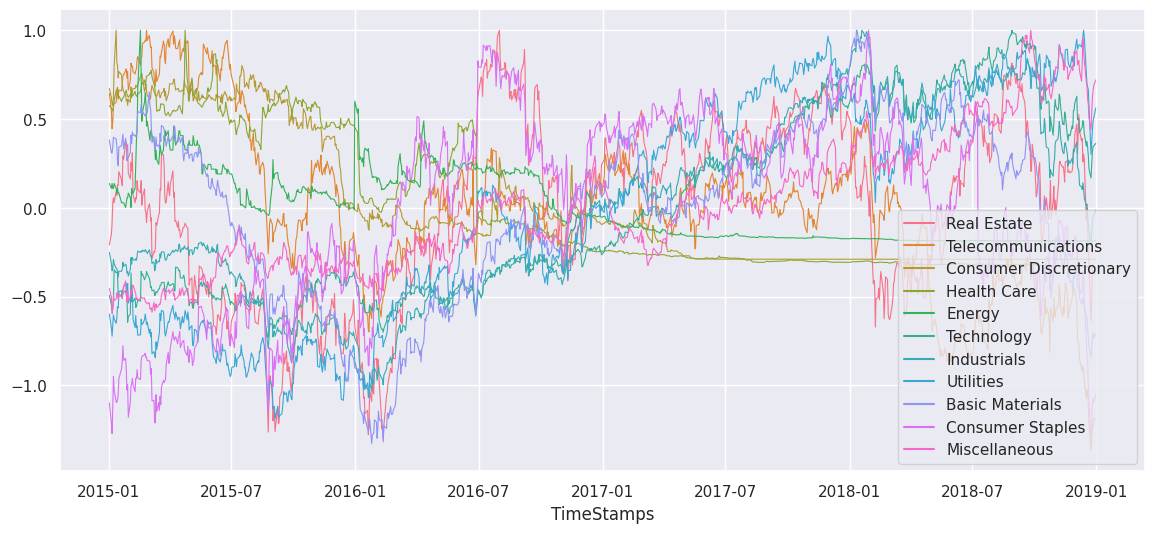

In [56]:
centralized = df_industry - df_industry.mean()
normalized = centralized / centralized.max()
normalized = normalized.drop(columns=['Finance'])
fig = seaborn.lineplot(data=normalized, dashes=False, linewidth=0.8)

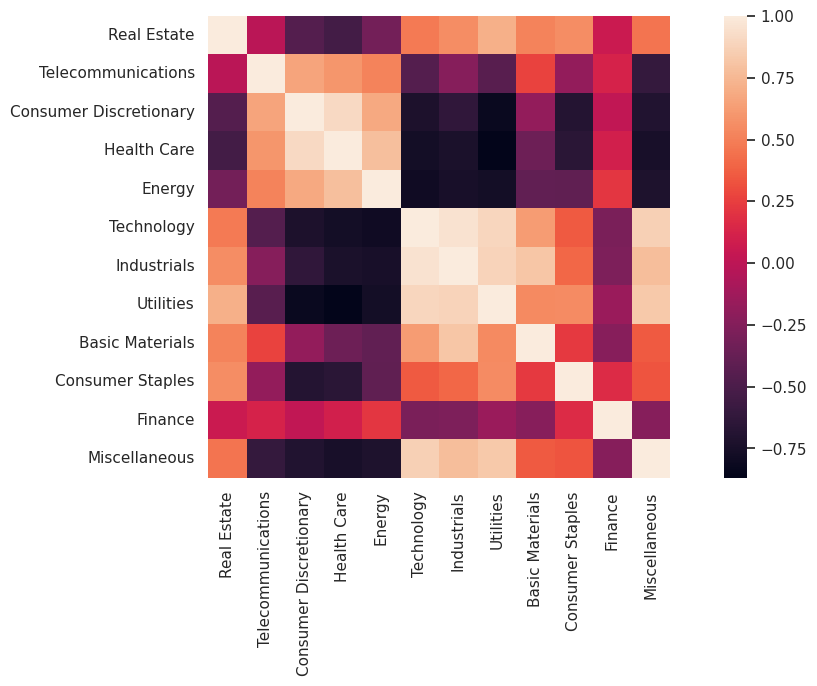

In [57]:
heatmap = seaborn.heatmap(df_industry.corr(), cbar=True, square=True)

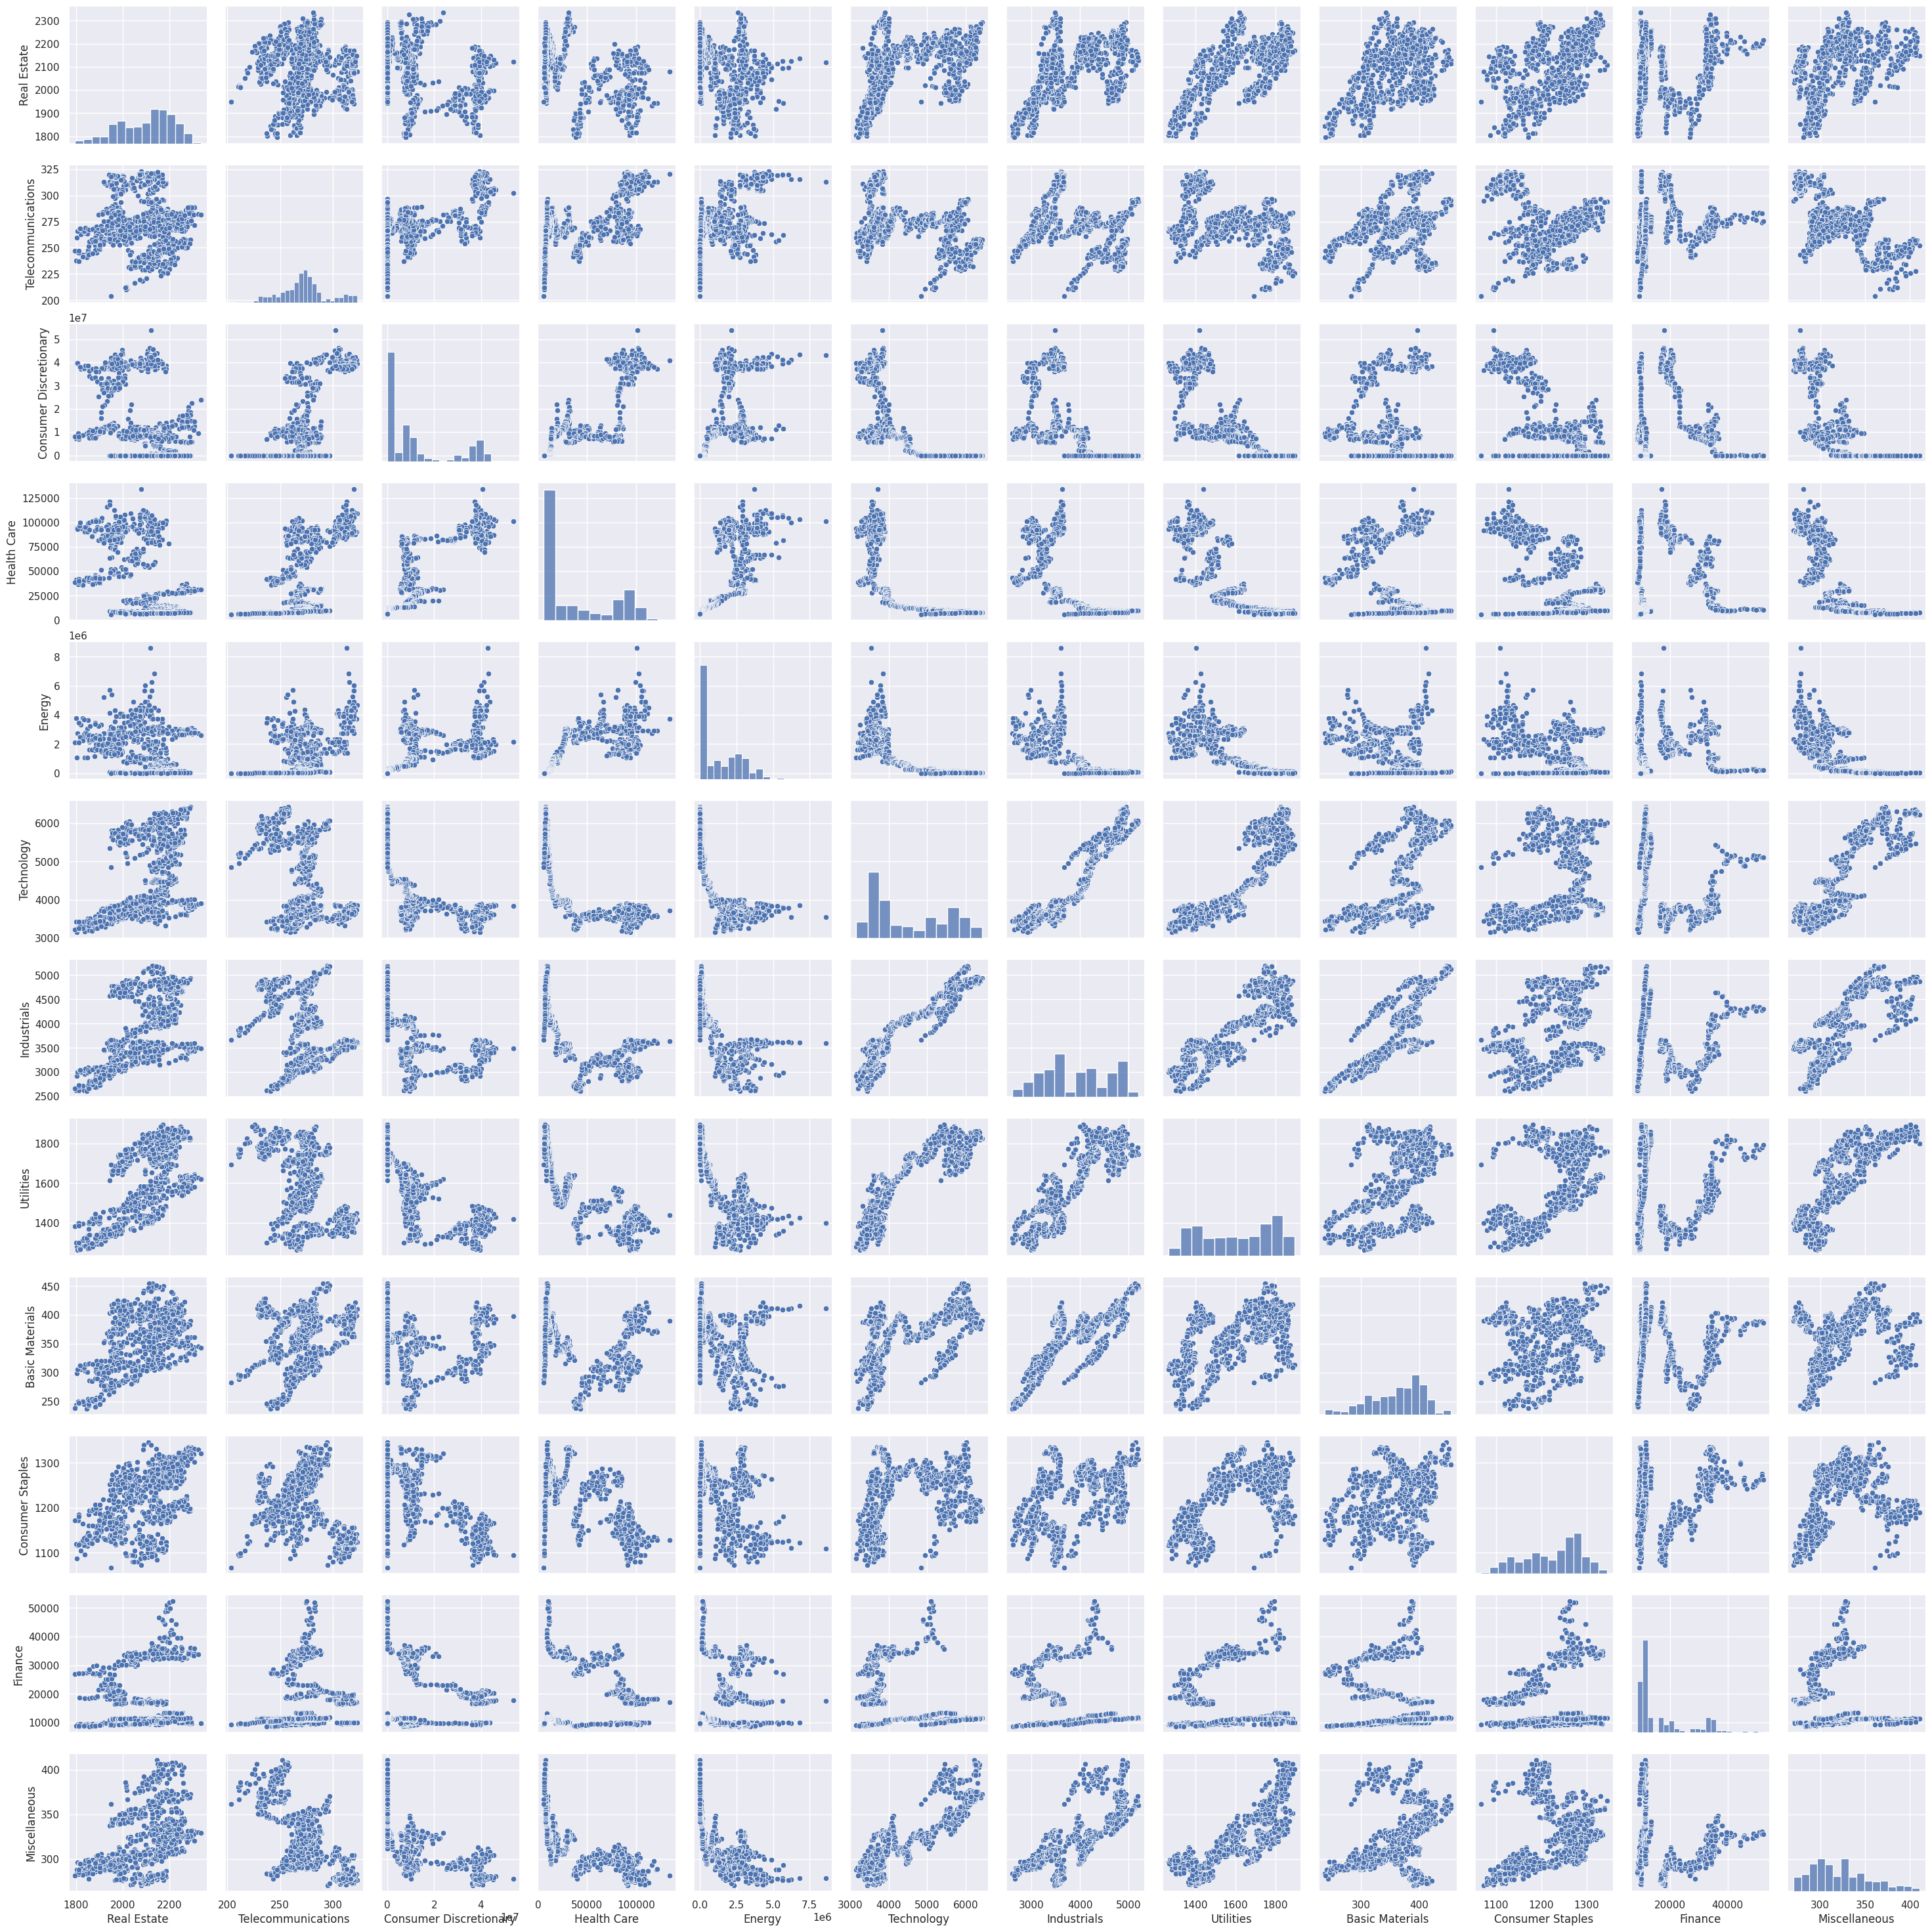

In [12]:
seaborn.pairplot(data=df_industry)

## Stock Indicator
It is rather hard to cluster stocks based on the opening and closing prices. Lets compute various statistical indicators which will be easier to handle for the clustering algorithm. We will use:
- Average return: average change in the closing price
- Return variance: variange of the change in the closing price

In [13]:
stats = {}
for sym in stock_symbol:
    # return
    daily_returns = stocks[sym]['Close'].pct_change()
    annual_mean_returns = daily_returns.mean() * loader.NOF_TRADING_DAYS

    # variance
    annual_return_variance = daily_returns.var() * loader.NOF_TRADING_DAYS
    
    stats[sym] = [annual_mean_returns, annual_return_variance]

stock_stats = pandas.DataFrame.from_dict(
    stats,
    orient='index',
    columns=['Return', 'Variance']
)
stock_stats

NameError: name 'stock_symbol' is not defined

Kmeans algorithm is relative vounerable to outliers therefor I am goint to remove quantile ...

In [ ]:
print(f"Number of stocks before removing outliers: {len(stock_stats)}")

q_return_high = stock_stats['Return'].quantile(0.99)
q_return_low = stock_stats['Return'].quantile(0.01)
stock_stats = stock_stats[(stock_stats["Return"] < q_return_high) & (stock_stats["Return"] > q_return_low)]

q_variance = stock_stats['Variance'].quantile(0.99)
stock_stats = stock_stats[stock_stats["Variance"] < q_variance]

print(f"Number of stocks after removing outliers: {len(stock_stats)}")

Number of stocks before removing outliers: 1413
Number of stocks after removing outliers: 1369


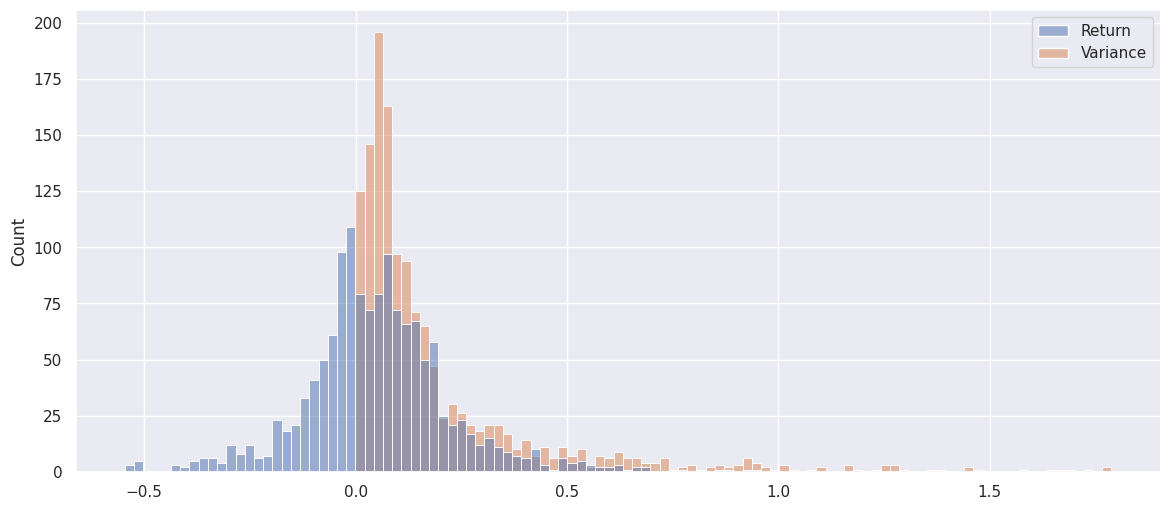

In [ ]:
histogrtam = seaborn.histplot(data=stock_stats)

## Clustering

### K-Means Algorithm

Text(0, 0.5, 'Sum of squared distances')

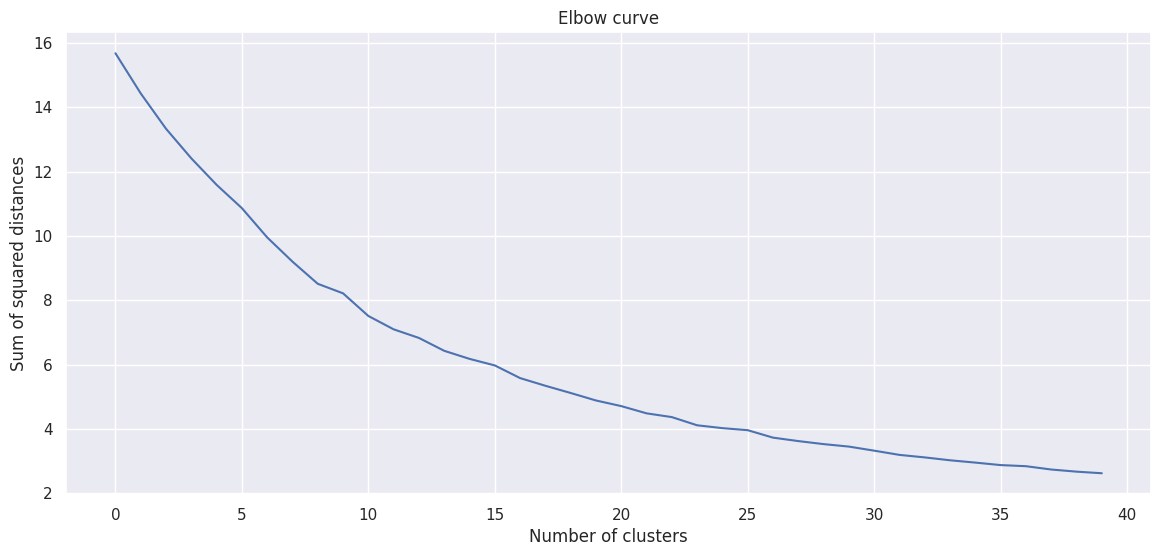

In [ ]:
X = stock_stats[['Return', 'Variance']]
SSE  = []

for i in range(10, 50):
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

elbow_curve = seaborn.lineplot(SSE)
elbow_curve.set_title("Elbow curve")
elbow_curve.set_xlabel("Number of clusters")
elbow_curve.set_ylabel("Sum of squared distances")

Number of stocks in cluster 0: 525
Number of stocks in cluster 1: 139
Number of stocks in cluster 2: 568
Number of stocks in cluster 3: 43
Number of stocks in cluster 4: 94


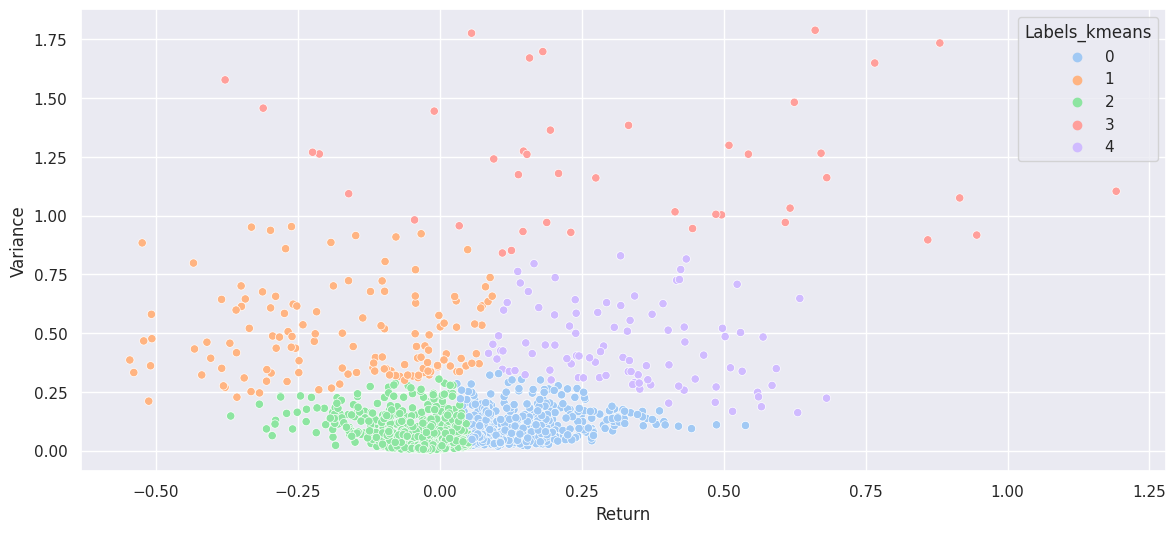

In [ ]:
n_clusters = 5
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(X)
stock_stats['Labels_kmeans'] = kmeans.predict(X)

for c in range(n_clusters):
    print(f"Number of stocks in cluster {c}: {len(stock_stats[stock_stats['Labels_kmeans'] == c])}")

clusterin_plot = seaborn.scatterplot(data=stock_stats, x='Return', y='Variance', hue='Labels_kmeans', palette='pastel')

Number of stocks in cluster 0: 117
Number of stocks in cluster 1: 470
Number of stocks in cluster 2: 163
Number of stocks in cluster 3: 36
Number of stocks in cluster 4: 135
Number of stocks in cluster 5: 120
Number of stocks in cluster 6: 64
Number of stocks in cluster 7: 264


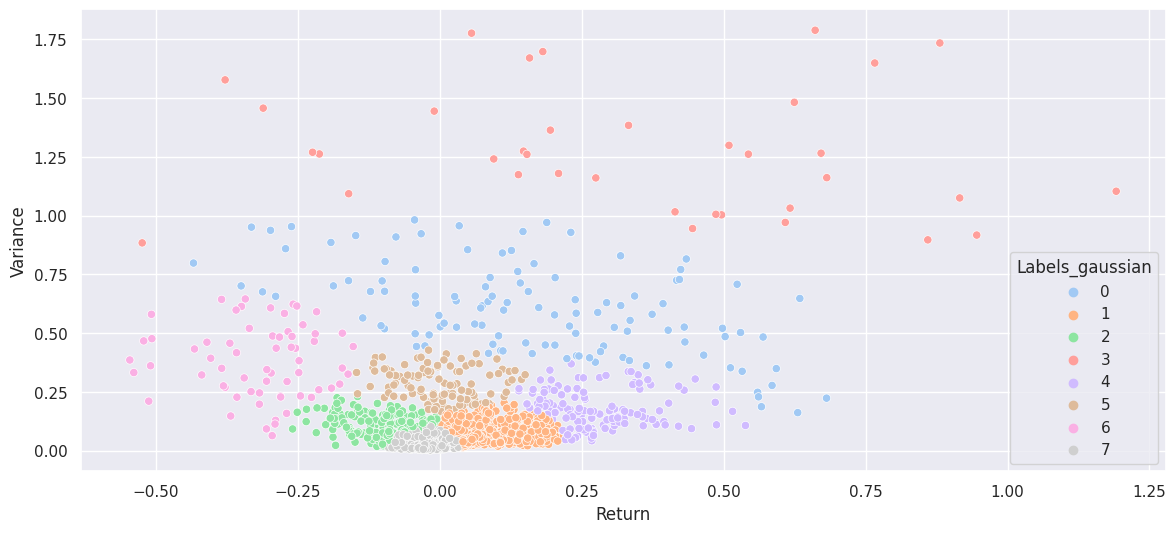

In [ ]:
n_components = 8
gaussian_mixture = sklearn.mixture.GaussianMixture(n_components=n_components, covariance_type='spherical')
gaussian_mixture.fit(X)
stock_stats['Labels_gaussian'] = gaussian_mixture.predict(X)

for c in range(n_components):
    print(f"Number of stocks in cluster {c}: {len(stock_stats[stock_stats['Labels_gaussian'] == c])}")

clusterin_plot = seaborn.scatterplot(data=stock_stats, x='Return', y='Variance', hue='Labels_gaussian', palette='pastel')

### Covariance matrix

### Seasonal Descompose

shrpe ratio
stupajuci rozptyl

In [ ]:
screener = pandas.read_csv("nasdaq_screener.csv")
screener[screener['Symbol'] == 'AA']['Sector'].iloc[0]

'Industrials'